# Liver Disease Classification Using Machine Learning
This project predicts liver disease using clinical patient data. Multiple machine learning models are trained and evaluated to determine the best performing model.


##  SDG Alignment

### SDG 3 – Good Health and Well Being
This project supports early detection of liver disease using predictive analytics.


## importing required libraries and loading dataset

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier

In [25]:
df=pd.read_csv("Liver Patient Dataset.csv", encoding="latin1")
df

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


##  Initial Data Exploration
Checking dataset structure, missing values and data types.



In [26]:
df.isna().sum(),df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

(Age of the patient                        2
 Gender of the patient                   902
 Total Bilirubin                         648
 Direct Bilirubin                        561
  Alkphos Alkaline Phosphotase           796
  Sgpt Alamine Aminotransferase          538
 Sgot Aspartate Aminotransferase         462
 Total Protiens                          463
  ALB Albumin                            494
 A/G Ratio Albumin and Globulin Ratio    559
 Result                                    0
 dtype: int64,
 None)

##  Data Cleaning

- Removing extra spaces and formatting column names.

### Handling Missing Values
- Median used for numerical columns
- Mode used for categorical column (Gender)


In [27]:
df.columns=df.columns.str.strip().str.replace(' ', '_')
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df["Gender_of_the_patient"] = df["Gender_of_the_patient"].fillna(df["Gender_of_the_patient"].mode()[0])
df.isna().sum()

Age_of_the_patient                      0
Gender_of_the_patient                   0
Total_Bilirubin                         0
Direct_Bilirubin                        0
Alkphos_Alkaline_Phosphotase            0
Sgpt_Alamine_Aminotransferase           0
Sgot_Aspartate_Aminotransferase         0
Total_Protiens                          0
ALB_Albumin                             0
A/G_Ratio_Albumin_and_Globulin_Ratio    0
Result                                  0
dtype: int64

###  Removing Duplicate Records
Duplicate patient records are removed.


In [28]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

11608


### Outlier Handling
Outliers are detected using IQR method and clipped within statistical limits.


In [29]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)

##  Dataset Summary
Displaying dataset structure and statistical summary.


In [30]:
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())

(19083, 11)
   Age_of_the_patient Gender_of_the_patient  Total_Bilirubin  \
0                65.0                Female              0.7   
1                62.0                  Male              5.3   
2                62.0                  Male              5.3   
3                58.0                  Male              1.0   
4                72.0                  Male              3.9   

   Direct_Bilirubin  Alkphos_Alkaline_Phosphotase  \
0               0.1                         187.0   
1               2.7                         467.0   
2               2.7                         467.0   
3               0.4                         182.0   
4               2.0                         195.0   

   Sgpt_Alamine_Aminotransferase  Sgot_Aspartate_Aminotransferase  \
0                           16.0                             18.0   
1                           64.0                            100.0   
2                           60.0                             68.0   
3       

## Class Distribution Visualization
Visualizing distribution of liver disease classes.


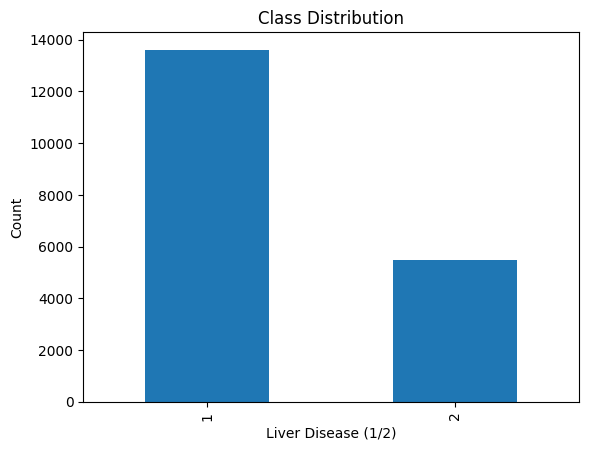

In [31]:
df['Result'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Liver Disease (1/2)")
plt.ylabel("Count")
plt.show()

##  Correlation Analysis
Identifying relationship between features and target variable.


In [32]:
correlation=df.corr(numeric_only=True)['Result']
print(correlation)

Age_of_the_patient                     -0.004597
Total_Bilirubin                        -0.313699
Direct_Bilirubin                       -0.320679
Alkphos_Alkaline_Phosphotase           -0.230792
Sgpt_Alamine_Aminotransferase          -0.286602
Sgot_Aspartate_Aminotransferase        -0.298538
Total_Protiens                          0.036707
ALB_Albumin                             0.165456
A/G_Ratio_Albumin_and_Globulin_Ratio    0.179971
Result                                  1.000000
Name: Result, dtype: float64


## Gender Based Analysis
Comparing liver disease distribution between male and female patients.


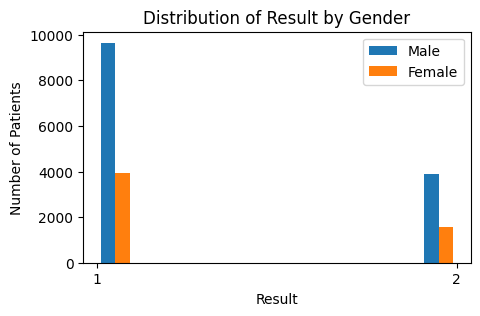

In [33]:
male_results = df[df['Gender_of_the_patient']=='Male']['Result']
female_results = df[df['Gender_of_the_patient']=='Female']['Result']
plt.figure(figsize=(5,3))
plt.hist([male_results, female_results],label=['Male','Female'])
plt.xticks([1, 2])
plt.xlabel("Result")
plt.ylabel("Number of Patients")
plt.title("Distribution of Result by Gender")
plt.legend()
plt.show()


## Feature Selection and Target Separation
Removing categorical column and separating features and target variable.


In [34]:
df=df.drop(columns=["Gender_of_the_patient"])
x=df.drop(columns=["Result"])
y=df["Result"]

## Train-Test Split and Feature Scaling
Dataset is divided into training and testing sets. StandardScaler is used for normalization.


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

##  Multi Layer Perceptron Model
Training neural network classifier and evaluating performance.


In [36]:

mlp = MLPClassifier(
    hidden_layer_sizes=(50, 25),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate='adaptive',
    max_iter=300,
    early_stopping=True,
    random_state=42
)
mlp.fit(x_train_scaled,y_train)
y_train_pred=mlp.predict(x_train_scaled)
y_test_pred=mlp.predict(x_test_scaled)

###  MLP Evaluation


In [37]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 0.9502161666448317
Testing Accuracy: 0.9457689284778622

Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.98      0.96      2780
           2       0.94      0.86      0.90      1037

    accuracy                           0.95      3817
   macro avg       0.94      0.92      0.93      3817
weighted avg       0.95      0.95      0.94      3817

Confusion Matrix:
[[2722   58]
 [ 149  888]]


##  Logistic Regression Model


In [38]:
lr=LogisticRegression()
lr.fit(x_train_scaled,y_train)
y_train_pred=lr.predict(x_train_scaled)
y_test_pred=lr.predict(x_test_scaled)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 0.7221931088693829
Testing Accuracy: 0.7340843594445899

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.91      0.83      2780
           2       0.52      0.27      0.36      1037

    accuracy                           0.73      3817
   macro avg       0.64      0.59      0.59      3817
weighted avg       0.70      0.73      0.70      3817

Confusion Matrix:
[[2521  259]
 [ 756  281]]


##  Random Forest Model


In [39]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_train_pred=rf.predict(x_train)
y_test_pred=rf.predict(x_test)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Training Accuracy: 1.0
Testing Accuracy: 0.9976421273251245

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2780
           2       1.00      0.99      1.00      1037

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817

Confusion Matrix:
[[2777    3]
 [   6 1031]]


## Hyperparameter Tuning
Optimizing Logistic Regression and Random Forest models using RandomizedSearchCV.


In [40]:
param_grid_lr= {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'fit_intercept': [True, False],
    'max_iter': [100, 500, 1000],
    'solver': ['liblinear']
}
grid = RandomizedSearchCV(estimator=lr, param_distributions=param_grid_lr, cv=5, scoring='accuracy',random_state=42)
grid.fit(x_train_scaled, y_train)
best_model = grid.best_estimator_
y_train_pred = best_model.predict(x_train_scaled)
y_test_pred = best_model.predict(x_test_scaled)
best_params_lr=grid.best_params_
print("Best Hyperparameters:", best_params_lr)

print("Best CV Accuracy:", grid.best_score_)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 500, 'fit_intercept': True, 'C': 100}
Best CV Accuracy: 0.7212763766773896
Training Accuracy: 0.7223241189571598
Testing Accuracy: 0.734346345297354

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.91      0.83      2780
           2       0.52      0.27      0.36      1037

    accuracy                           0.73      3817
   macro avg       0.65      0.59      0.59      3817
weighted avg       0.70      0.73      0.70      3817

Confusion Matrix:
[[2521  259]
 [ 755  282]]


In [41]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf=RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, scoring='accuracy',random_state=42)
grid_rf.fit(x_train, y_train)
best_model = grid_rf.best_estimator_
y_train_pred=best_model.predict(x_train)
y_test_pred=best_model.predict(x_test)
best_params_rf=grid_rf.best_params_
print("Best Hyperparameters:", best_params_rf)
print("Best CV Accuracy:", grid_rf.best_score_)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best CV Accuracy: 0.9954146897498053
Training Accuracy: 1.0
Testing Accuracy: 0.9981660990306523

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2780
           2       1.00      1.00      1.00      1037

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817

Confusion Matrix:
[[2778    2]
 [   5 1032]]


## Feature Importance Selection
Decision Tree is used to identify most important features.


In [42]:
dt=DecisionTreeClassifier(max_depth=5,random_state=42)
dt.fit(x_train_scaled, y_train)
importance = dt.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': importance
}).sort_values(by='importance', ascending=False)


top_features = feature_importance_df['feature'][:6].tolist()
print("Top 8 features:", top_features)
x_train_top = x_train[top_features]
x_test_top = x_test[top_features]

Top 8 features: ['Total_Bilirubin', 'Sgpt_Alamine_Aminotransferase', 'Alkphos_Alkaline_Phosphotase', 'Total_Protiens', 'Sgot_Aspartate_Aminotransferase', 'A/G_Ratio_Albumin_and_Globulin_Ratio']


In [43]:
lr=LogisticRegression(max_iter=300,random_state=42)
lr.fit(x_train_top,y_train)
y_train_pred=lr.predict(x_train_top)
y_test_pred=lr.predict(x_test_top)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 0.7222586139132713
Testing Accuracy: 0.7309405292114226

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.92      0.83      2780
           2       0.51      0.22      0.31      1037

    accuracy                           0.73      3817
   macro avg       0.64      0.57      0.57      3817
weighted avg       0.69      0.73      0.69      3817

Confusion Matrix:
[[2560  220]
 [ 807  230]]


In [44]:
rf=RandomForestClassifier(max_depth=5,random_state=42)
rf.fit(x_train_top,y_train)
y_train_pred=rf.predict(x_train_top)
y_test_pred=rf.predict(x_test_top)
print("Best Hyperparameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 500, 'fit_intercept': True, 'C': 100}
Best CV Accuracy: 0.7212763766773896
Training Accuracy: 0.8150137560592166
Testing Accuracy: 0.8176578464762903

Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.96      0.88      2780
           2       0.80      0.44      0.57      1037

    accuracy                           0.82      3817
   macro avg       0.81      0.70      0.73      3817
weighted avg       0.81      0.82      0.80      3817

Confusion Matrix:
[[2662  118]
 [ 578  459]]


##  Model Retraining Using Top Features
Models are retrained using selected important features.


In [45]:
lr=LogisticRegression(**best_params_lr)
lr.fit(x_train_top,y_train)
y_train_pred=lr.predict(x_train_top)
y_test_pred=lr.predict(x_test_top)
lr_train_acc = accuracy_score(y_train, y_train_pred)
lr_train_precision = precision_score(y_train, y_train_pred)
lr_train_recall = recall_score(y_train, y_train_pred)
lr_train_f1 = f1_score(y_train, y_train_pred)

lr_test_acc = accuracy_score(y_test, y_test_pred)
lr_test_precision = precision_score(y_test, y_test_pred)
lr_test_recall = recall_score(y_test, y_test_pred)
lr_test_f1 = f1_score(y_test, y_test_pred)
lr_cv_score=grid.best_score_
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
[[2552  228]
 [ 810  227]]


In [46]:
rf=RandomForestClassifier(**best_params_rf)
rf.fit(x_train_top,y_train)
y_train_pred=rf.predict(x_train_top)
y_test_pred=rf.predict(x_test_top)
rf_train_acc = accuracy_score(y_train, y_train_pred)
rf_train_precision = precision_score(y_train, y_train_pred)
rf_train_recall = recall_score(y_train, y_train_pred)
rf_train_f1 = f1_score(y_train, y_train_pred)

rf_test_acc = accuracy_score(y_test, y_test_pred)
rf_test_precision = precision_score(y_test, y_test_pred)
rf_test_recall = recall_score(y_test, y_test_pred)
rf_test_f1 = f1_score(y_test, y_test_pred)

rf_cv_score=grid_rf.best_score_
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
[[2778    2]
 [  10 1027]]


## Final Model Comparison
Comparing performance metrics of optimized models.


In [47]:
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Features': [len(top_features), len(top_features)],
    'CV Score': [round(lr_cv_score, 2), round(rf_cv_score, 2)],
    'Accuracy': [round(lr_test_acc, 2), round(rf_test_acc, 2)],
    'Precision': [round(lr_test_precision, 2), round(rf_test_precision, 2)],
    'Recall': [round(lr_test_recall, 2), round(rf_test_recall, 2)],
    'F1-Score': [round(lr_test_f1, 2), round(rf_test_f1, 2)]
})

print(comparison_df)

                 Model  Features  CV Score  Accuracy  Precision  Recall  \
0  Logistic Regression         6      0.72      0.73       0.76    0.92   
1        Random Forest         6      1.00      1.00       1.00    1.00   

   F1-Score  
0      0.83  
1      1.00  
